In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
iris = load_iris()

In [2]:
X = iris.data
y = iris.target
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [3]:
tree_clf = DecisionTreeClassifier(criterion = "gini",max_depth=5, random_state=42)
tree_clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [4]:
y_pred = tree_clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f"acc: ",acc)

acc:  1.0


In [5]:
conf_matrix = confusion_matrix(y_pred,y_test)
print(f"conf matrix :")
print(conf_matrix)

conf matrix :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


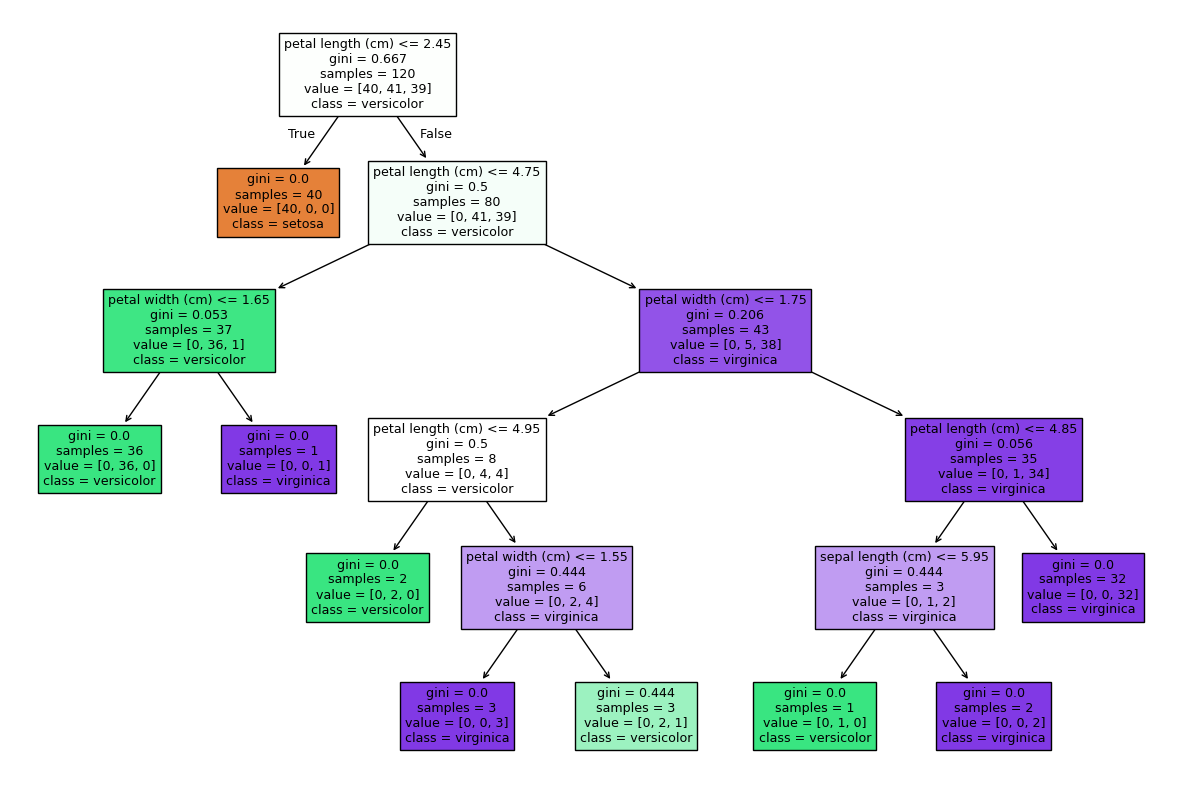

In [6]:
plt.figure(figsize = (15,10))
plot_tree(tree_clf,filled=True,feature_names = iris.feature_names,class_names=[str(c) for c in iris.target_names])
plt.show()

In [9]:
feature_importances=tree_clf.feature_importances_
feature_names = iris.feature_names
feature_importance_sorted=sorted(zip(feature_importances,feature_names))

for importance, feature_name in feature_importance_sorted:
    print(f"{feature_name} : {importance}")

sepal width (cm) : 0.0
sepal length (cm) : 0.016952744225471498
petal width (cm) : 0.07849499604256478
petal length (cm) : 0.9045522597319637


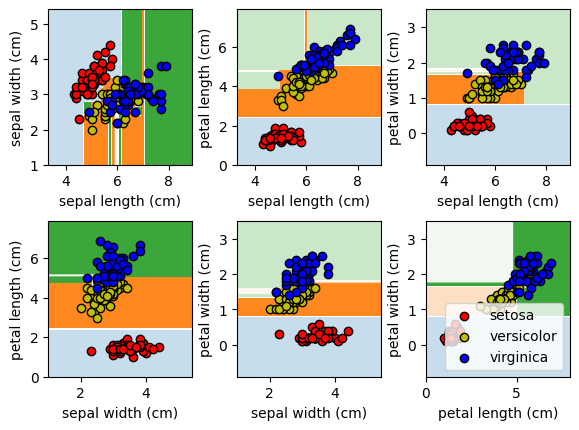

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import warnings
warnings.filterwarnings("ignore")
n_classes = len(iris.target_names)
plot_colors = "ryb"

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    clf = DecisionTreeClassifier().fit(X,y)
    ax = plt.subplot(2,3,pairidx+1)
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf,
                                          X,
                                          cmap = plt.cm.RdYlBu,
                                          respons_methot = "predict",
                                          ax = ax,
                                          xlabel = iris.feature_names[pair[0]],
                                          ylabel = iris.feature_names[pair[1]]
                                          )
    for i,color in zip(range(n_classes),plot_colors):
        idx=np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1], c=color, 
                    label= iris.target_names[i],
                    cmap = plt.cm.RdYlBu,
                    edgecolors = "black")

plt.legend()

## diabet veri seti ile çalışma

In [20]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
diabetes = load_diabetes()

In [21]:
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)
y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mse: ",mse)
print("rmse: ",rmse)

mse:  4976.797752808989
rmse:  70.54642267903446
